In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim

In [2]:
complaint = pd.read_csv("Comcast_telecom_complaints_data.csv")
complaint.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
complaint.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [4]:
complaint['Date_month_year'] = pd.to_datetime(complaint['Date_month_year'])

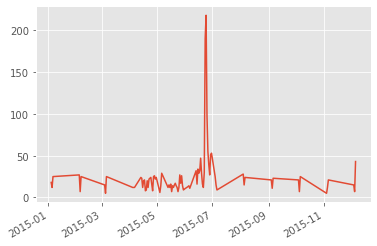

In [5]:
 complaint['Date_month_year'].value_counts().plot();

In [6]:
complaint['Customer Complaint'].value_counts()

Comcast                                      83
Comcast Internet                             18
Comcast Data Cap                             17
comcast                                      13
Comcast Data Caps                            11
                                             ..
bill payment                                  1
Comcast Cable Billing Fraud                   1
disrupted internet service                    1
Issues with Comcast billing and equipment     1
CHARGED ERRONEOUS FEE ON BILL                 1
Name: Customer Complaint, Length: 1841, dtype: int64

In [7]:
complaint['Status'].dtypes

dtype('O')

In [8]:
complaint['New Status'] = ['Open' if (status=='Open' or status=='Pending') else 'Closed' for status in complaint['Status']]

In [9]:
Status_complaints = complaint.groupby(['State', 'New Status']).size().unstack().fillna(0)

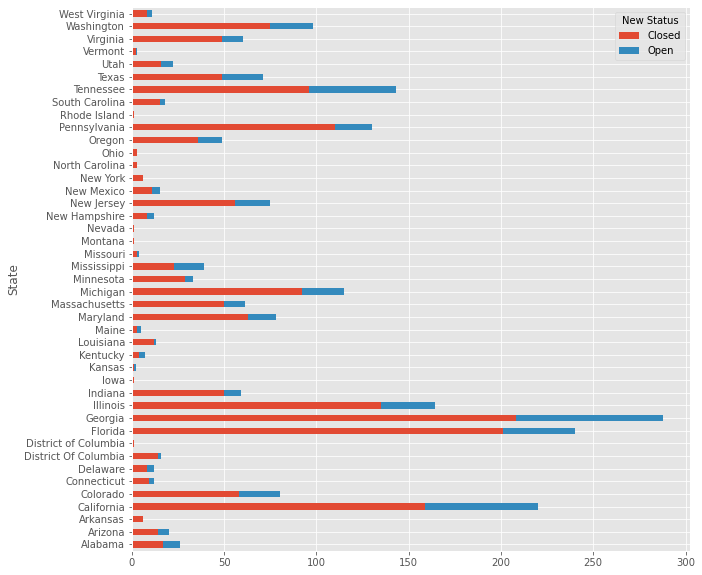

In [10]:
Status_complaints.plot(kind='barh', stacked=True, figsize=(10,10));

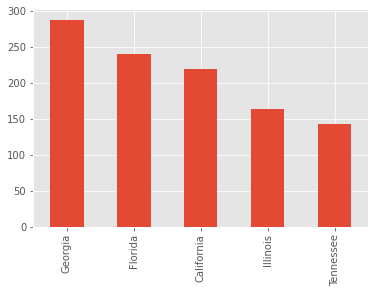

In [11]:
complaint['State'].value_counts().head().plot(kind='bar');

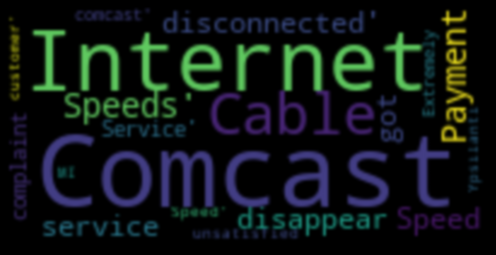

In [12]:
txt = complaint['Customer Complaint'].values
wc = WordCloud(width=200, height=100, stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(7,7), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation='bicubic')
plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [14]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])  
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [15]:
doc_complete = complaint['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]
doc_clean

[['comcast', 'cable', 'internet', 'speed'],
 ['payment', 'disappear', 'service', 'got', 'disconnected'],
 ['speed', 'service'],
 ['comcast',
  'imposed',
  'new',
  'usage',
  'cap',
  '300gb',
  'punishes',
  'streaming'],
 ['comcast', 'working', 'service', 'boot'],
 ['isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee'],
 ['throttling', 'service', 'unreasonable', 'data', 'cap'],
 ['comcast', 'refuse', 'help', 'troubleshoot', 'correct', 'service'],
 ['comcast', 'extended', 'outage'],
 ['comcast', 'raising', 'price', 'available', 'ask'],
 ['billing', 'service', 'asked', 'disconnected'],
 ['yahoo', 'failure', 'restore', 'email', 'search', 'feature'],
 ['comcast',
  'violating',
  'open',
  'internet',
  'rule',
  'blocking',
  'hbo',
  'go',
  'access',
  'sony',
  'console'],
 ['internet', 'speed'],
 ['internet', 'disconnect', 'every', 'night'],
 ['internet', 'complaint'],
 ['internet', 'availability', 'speed'],
 ['comcast', 'owes', '65', 'claim', 'need', 'return', 'equipm

In [16]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [17]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [18]:
lda_model = LdaModel(doc_term_matrix, num_topics=9, id2word=dictionary, passes=30)

word_dict = {}
for i in range(9):
    words = lda_model.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8,Topic # 9
0,pricing,comcast,comcast,comcast,comcast,billing,internet,data,comcast
1,speed,service,charge,internet,cable,comcast,speed,comcast,contract
2,comcastxfinity,internet,bill,price,false,issue,service,cap,monthly
3,charged,complaint,fee,problem,deceptive,practice,slow,internet,modem
4,comcast,customer,without,high,sale,unfair,connection,usage,3
5,paying,poor,price,charge,switch,xfinity,help,throttling,email
6,billed,xfinity,account,bill,advertising,complaint,get,month,bad
7,refund,payment,incorrect,monopoly,bait,cramming,outage,terrible,horrible
8,pay,misleading,credit,speed,hbo,monopolistic,day,2,call
9,promised,xfinitycomcast,paying,phone,practice,lack,connectivity,limit,lied


In [19]:
Lda_display = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)